# Cálculo de Erro - Medidas StimSHIELD

Ref.:
- http://www.estatica-metrologia.com.br/erros.php
- https://www.wmo.int/pages/prog/gcos/documents/gruanmanuals/UK_NPL/mgpg11.pdf

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import fnmatch
import os

In [3]:
files = !ls ./amplitude_e_frequencia/*.csv
df = pd.concat([pd.read_csv(f, skiprows=1, index_col=0) for f in files], axis=1, keys=files)
pd.to_datetime(df.index, unit='ms');

In [4]:
df.describe().transpose()

count      mean  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  50000.0 -0.689656   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  50000.0 -0.305609   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  50000.0 -0.313329   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  50000.0 -0.485020   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  50000.0 -0.484614   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  50000.0 -0.285536   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  50000.0 -0.663205   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  50000.0 -0.659755   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  50000.0 -0.282436   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  50000.0 -0.651513   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  50000.0 -0.654618   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  50000.0 -0.471203   

                                                               std        min  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  23.770840 -34.045226   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  23.797588 -33.316583   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  23.808758 -32.537689   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  23.740217 -33.994975   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  23.794599 -34.472362   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  23.923358 -33.643216   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  23.945757 -33.040201   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  23.942043 -33.994975   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  23.969928 -34.246231   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  23.960971 -34.195980   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  23.984946 -34.723618   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  23.889653 -33.216081   

                                                               25%      50%  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.577890 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.628141 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.753769 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.678392 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.854272 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.778895 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.954774 -0.40201   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.954774 -0.40201   

                                                               75%        max  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  32.160804  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  30.804020  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  35.502513  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  31.432161  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.748744  31.206030  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.748744  31.608040  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.748744  30.502513  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.748744  31.633166  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  29.924623  30.653267  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  29.849246  30.552764  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.025126  30.552764  
./

In [5]:
df.plot(legend=None)

In [6]:
df_picos = df[df > 28]
df_picos.dropna(inplace=True)

In [7]:
df_picos.describe().transpose()

count       mean  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0  29.777964   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0  29.824603   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0  29.832516   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0  29.911286   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0  29.984550   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0  30.012544   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0  30.037818   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0  30.035666   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0  30.073370   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0  30.066395   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0  30.090296   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0  30.114192   

                                                              std        min  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.150125  29.045226   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.156463  29.346734   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.160401  29.346734   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.186677  29.145729   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.183669  29.145729   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.174767  29.145729   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.167509  28.668342   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.169702  28.567839   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.147622  29.396985   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.154469  28.492463   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.142127  28.618091   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.140228  28.718593   

                                                               25%        50%  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  29.748744   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  29.748744   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  29.748744   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  29.824121   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.748744  30.100503   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.798995  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.874372  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  29.874372  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.075377  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.050251  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.150754  30.150754   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.150754  30.150754   

                                                               75%        max  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.748744  32.160804  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.899498  30.150754  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  29.924623  30.150754  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  30.150754  31.432161  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  30.150754  31.206030  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  30.150754  30.502513  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  30.150754  30.502513  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  30.150754  31.633166  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.150754  30.552764  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  30.150754  30.552764  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt 

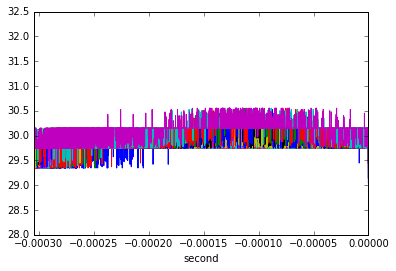

In [8]:
df_picos.plot(legend=None)

In [9]:
df_vales = df[df < -28]
df_vales.dropna(inplace=True)

In [10]:
df_vales.describe().transpose()

count       mean  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0 -30.826448   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0 -30.849441   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0 -30.869461   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  15225.0 -30.912273   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0 -30.980948   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0 -30.981395   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0 -31.015666   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  15225.0 -30.999650   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0 -31.040356   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0 -31.026491   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0 -31.063611   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  15225.0 -31.087563   

                                                              std        min  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.282202 -34.045226   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.284845 -33.316583   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.287023 -32.537689   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt  0.291394 -33.994975   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.287089 -34.472362   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.280887 -33.643216   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.274084 -32.738694   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt  0.281305 -33.994975   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.269497 -34.246231   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.279742 -34.195980   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.261734 -34.723618   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt  0.262070 -33.216081   

                                                               25%        50%  \
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.954774 -30.929648   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.954774 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.954774 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -31.030151 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -31.356784 -30.954774   
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -31.356784 -30.954774   

                                                               75%        max  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -29.698493  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -29.648241  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -29.648241  
./amplitude_e_frequencia/Amplitude - Bateria1 -... Volt -30.552764 -29.296483  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.804020 -29.673367  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.829146 -29.673367  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.954774 -30.276382  
./amplitude_e_frequencia/Amplitude - Bateria2 -... Volt -30.904523 -29.296483  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.954774 -30.075377  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt -30.954774 -30.326633  
./amplitude_e_frequencia/Amplitude - Bateria3 -... Volt 

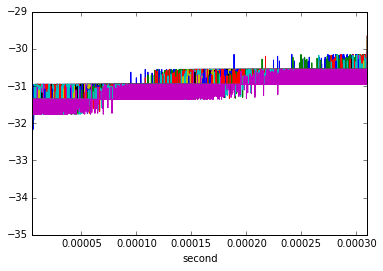

In [11]:
df_vales.plot(legend=None)

## Cálculo da Incerteza de Medição

### Equações

#### Desvio Padrão (S)

\begin{equation*}
S = {\sqrt{\sum(MM - M^2)} \over n-1}
\end{equation*}

Onde:  
s = Desvio Padrão;  
MM = Média das Medidas;  
M = Valores obtidos em cada leitura efetuada no sistema de medição;  
n = Número total de ensaios em cada ponto medido.  

### Cáculo da Incerteza tipo A (Ua)

\begin{equation*}
U_a = {S \over \sqrt{n}}
\end{equation*}

Onde:   
Ua = Incerteza de Medição tipo A;  
s = Desvio Padrão;  
n = Número total de ensaios em cada ponto medido.  

### Cálculo da Incerteza em função da resolução (Ures)

\begin{equation*}
U_{res} = {res \over 2}
\end{equation*}

Onde:  
Ures = Incerteza em função da resolução;   
res = Resolução em função da divisão de escala do instrumento;  

### Cálculo da Incerteza Combinada (Uc)

\begin{equation*}
U_{c} = \sqrt{U_{a}^{2} + U_{pad}^{2} + U_{res}^{2}}
\end{equation*}

Onde:  
Uc = Incerteza de Medição Combinada;  
Ua = Incerteza de Medição do tipo A;  
Upad = Incerteza de Medição do padrão utilizado;(\*\*)  
Ures = Incerteza de medição em função da resolução;   

(\*\*) A incerteza em função do padrão deve ser dividida por seu fator multiplicativo, conforme certificado.  
(Ex.: k=2, dividir a incerteza por 2/k=2,47, dividir a incerteza do padrão por 2,47).  
Se não houver declaração de incerteza expandida (fator k), dividir a incerteza por raiz de três.

### Cálculo da Incerteza Expandida (U95)

\begin{equation*}
U95 = k.U_{c}
\end{equation*}

Onde:   
Uc = Incerteza de Medição Combinada;   
k = Fator de abrangência para um nível de confiança aproximado de 95%, onde k@2;  
U95 = Incerteza de Medição Expandida com nível de confiança de 95%;  
Obs.: O fator k está diretamente relacionado com o grau de probabilidade de acerto do cálculo da incerteza. Para cada percentual existe um valor k definido. Este valor pode ter variações no seu valor em função do número de medidas realizadas e também das fontes de incerteza a serem consideradas.   
k = 1 ® Probabilidade = 68%;  
k = 2 ® Probabilidade = 95%;  
k = 3 ® Probabilidade = 99%;  

## Incerteza da Medição (pico a pico)

In [12]:
print('Média de todas as medições:', df.mean().mean())

Ua = df.std().mean()/np.sqrt(df.mean().count())
print("Ua =", Ua)

res = 0.000001 # extraído da medida, valor minimo capaz de ser adquirido pelo equipamento
Ures = res/2
print("Ures =", Ures)

Upad = ((df.max().mean() - df.min().mean())/2)/np.sqrt(3)
Uc = np.sqrt(Ua**2 + Upad**2 + Ures**2)
print("Upad =", Upad)
print("Uc =", Uc)

k = 1/np.sqrt(3)
U95 = k*Uc
print("U95 =", U95)

Média de todas as medições: -0.495541168032
Ua = 6.89280823084
Ures = 5e-07
Upad = 18.8309754788
Uc = 20.0528412647
U95 = 11.5775133022


## Incerteza da Medição (pico)

In [13]:
print('Média de todas as medições:', df_picos.mean().mean())

Ua = df_picos.std().mean()/np.sqrt(df_picos.mean().count())
print("Ua =", Ua)

res = 0.000001 # extraído da medida, valor minimo capaz de ser adquirido pelo equipamento
Ures = res/2
print("Ures =", Ures)

Upad = ((df_picos.max().mean() - df_picos.min().mean())/2)/np.sqrt(3)
Uc = np.sqrt(Ua**2 + Upad**2 + Ures**2)
print("Upad =", Upad)
print("Uc =", Uc)

k = 1/np.sqrt(3)
U95 = k*Uc
print("U95 =", U95)

Média de todas as medições: 29.9800999669
Ua = 0.0465190253659
Ures = 5e-07
Upad = 0.541568095939
Uc = 0.54356234441
U95 = 0.313825865866


## Incerteza da Medição (vale)

In [14]:
print('Média de todas as medições:', df_vales.mean().mean())

Ua = df_vales.std().mean()/np.sqrt(df_vales.mean().count())
print("Ua =", Ua)

res = 0.000001 # extraído da medida, valor minimo capaz de ser adquirido pelo equipamento
Ures = res/2
print("Ures =", Ures)

Upad = ((df_vales.max().mean() - df_vales.min().mean())/2)/np.sqrt(3)
Uc = np.sqrt(Ua**2 + Upad**2 + Ures**2)
print("Upad =", Upad)
print("Uc =", Uc)

k = 1/np.sqrt(3)
U95 = k*Uc
print("U95 =", U95)

Média de todas as medições: -30.9711085204
Ua = 0.0803929426317
Ures = 5e-07
Upad = 1.14418348841
Uc = 1.14700430704
U95 = 0.662223245431
